In [ ]:
!pip install pyproj

In [ ]:
!pip install geopandas

In [ ]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.2 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890039 sha256=74e8e8176d8a943bc591d4e1928629d7f0b2495a2679ae918e9f201e8044d180
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely


In [ ]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time
from astropy.stats import RipleysKEstimator
import geopandas as gpd
import shapely

## **Trabajo Hecho en Clase**

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df_original = pd.read_csv(ruta)
df_original

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
df_original['x'], df_original['y'] = P(df_original['longitud'], df_original['latitud'])
df_original

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


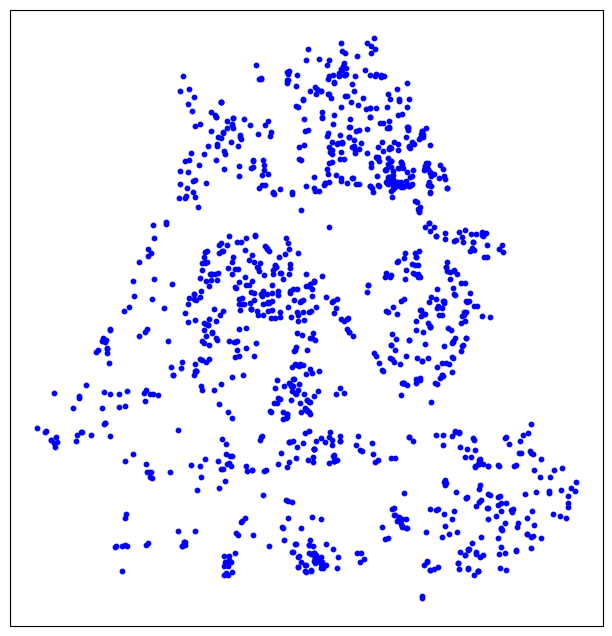

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)
ax.scatter(df_original['longitud'], df_original['latitud'], zorder=10, c='b', s=10)
plt.show()

In [ ]:
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'
file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]
for file in file_list:
    urllib.request.urlretrieve(url+file, file)

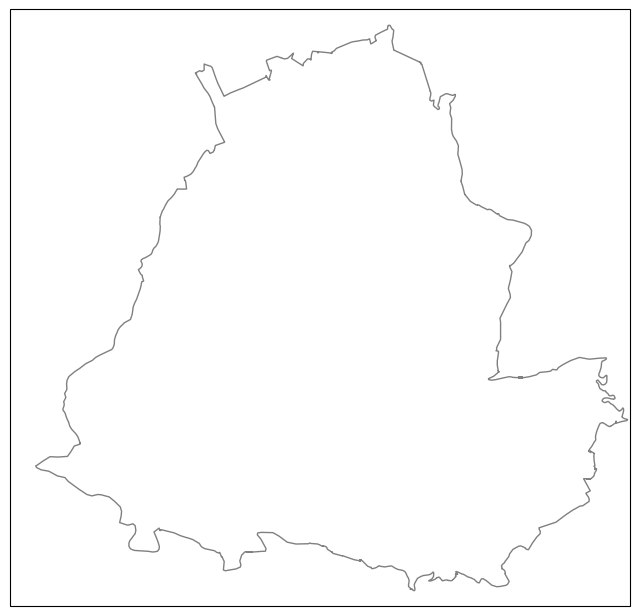

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos de Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

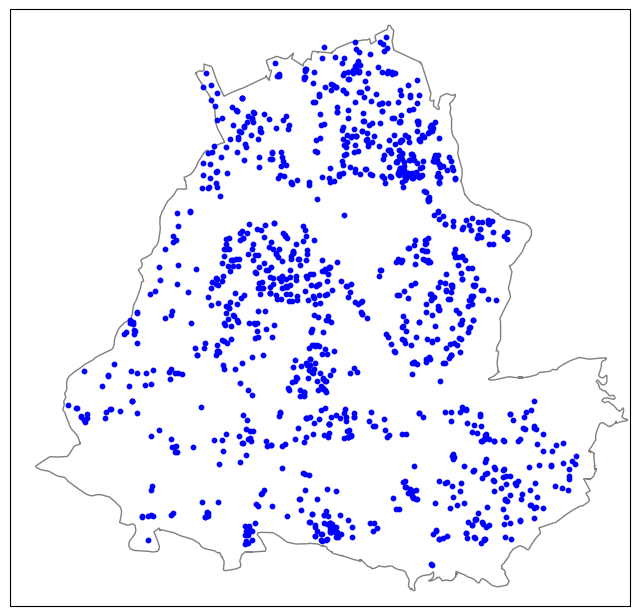

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos de Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df_original['longitud'], df_original['latitud'], zorder=10, c='b', s=10)

plt.show()

In [ ]:
df_copia = df_original

In [ ]:
data = gpd.read_file("68276_urbano.shp")
data

,EXTRUDE,COUNT,geometry
0,0,215,"POLYGON ((-73.11295 7.06176, -73.11340 7.06220..."


<Axes: >

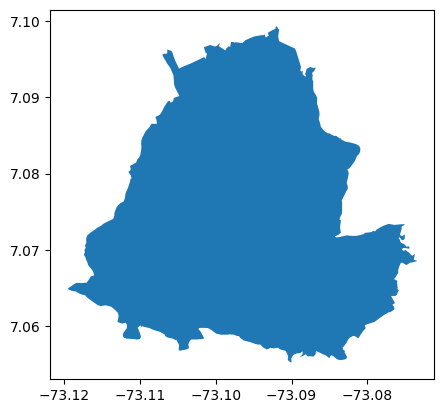

In [ ]:
%matplotlib inline
data.plot()

In [ ]:
print(data['geometry'])

0    POLYGON ((-73.11295 7.06176, -73.11340 7.06220...
Name: geometry, dtype: geometry


In [ ]:
data_copy = data

In [ ]:
crs = pyproj.CRS(proj='utm', zone=18, elips='WGS84')
data_copy = data_copy.to_crs(crs)
data['poly_area'] = data_copy['geometry'].area
area = float(data['poly_area'])
print("Area de floridablanca: ", area)

Area de floridablanca:  14180920.862356503


In [ ]:
def distancia(x1,y1,x2,y2):
  return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [ ]:
points = [[x, y] for x, y in zip(df_original['x'], df_original['y'])]
contador = 0

for i in range(len(points)):
    x1, y1 = points[i]
    for j in range(i + 1, len(points)):
        x2, y2 = points[j]
        dist = distancia(x1, y1, x2, y2)
        if dist <= 100:
          contador += 1

print(f"Numero total de puntos pares que estan cercanos entre si en un rango de 100 metros o menos: {contador}")

Numero total de pares puntos que estan entre si a 100 metros o menos: 3978


In [ ]:
def k_ripley (df, metros, area):
  points = [[x, y] for x, y in zip(df['x'], df['y'])]
  contador = 0

  for i in range(len(points)):
      x1, y1 = points[i]
      for j in range(i + 1, len(points)):
          x2, y2 = points[j]
          dist = distancia(x1, y1, x2, y2)
          if dist <= metros:
            contador += 1
  print(f"Numero total de pares puntos que estan cercanos entre si a" ,metros, "metros o menos:", contador)

  ripley = (area/len(points)**2)*contador
  print(f"Numero de ripley:", ripley)
  return ripley

In [ ]:
k_ripley(df_original,100,area)

Numero total de pares puntos que estan entre si a 100 metros o menos: 3978
Numero de ripley: 35420.158673535436


35420.158673535436

In [ ]:
poligono = gpd.read_file("68276_urbano.shp")
crs = poligono.crs
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
n_puntos = 1262
puntos_a = []

for s in range(n_puntos):
  while True:
        punto_x = np.random.uniform(poligono.bounds.minx, poligono.bounds.maxx)
        punto_y = np.random.uniform(poligono.bounds.miny, poligono.bounds.maxy)
        punto = shapely.geometry.Point(punto_x[0], punto_y[0])
        punto_shapely = shapely.geometry.Point(punto_x, punto_y)
        if poligono.geometry.contains(punto_shapely).any():
            puntos_a.append(punto)
            break
puntos_df = gpd.GeoDataFrame(geometry=puntos_a, crs=poligono.crs)

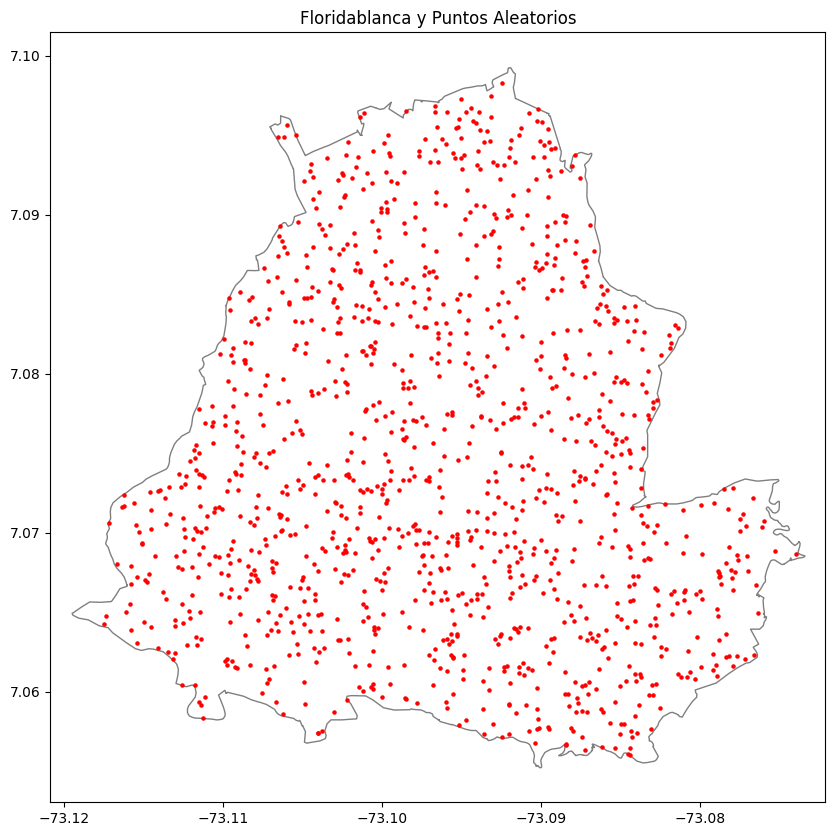

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
poligono.plot(ax=ax, color="white", alpha=0.5, edgecolor='k')

puntos_df.plot(ax=ax, color='red', markersize=5)

plt.title('Floridablanca y Puntos Aleatorios')
plt.axis('equal')
plt.show()

In [ ]:
puntos_df


,geometry
0,POINT (-73.10425 7.07349)
1,POINT (-73.10453 7.09278)
2,POINT (-73.11058 7.07130)
3,POINT (-73.10236 7.09122)
4,POINT (-73.09036 7.08668)
...,...
1257,POINT (-73.10328 7.08580)
1258,POINT (-73.10301 7.07330)
1259,POINT (-73.08267 7.06639)
1260,POINT (-73.08840 7.08099)


In [ ]:
puntos_df['longitud'] = puntos_df.geometry.x
puntos_df['latitud'] = puntos_df.geometry.y
puntos_df['x'], puntos_df['y'] = P(puntos_df['longitud'], puntos_df['latitud'])

In [ ]:
k_ripley(puntos_df,100,area)

Numero total de pares puntos que estan entre si a 100 metros o menos: 1768
Numero de ripley: 15742.292743793527


15742.292743793527

In [ ]:
num_mapas = 9
mapas_de_puntos = []
coordenadas_proyectadas = []
for _ in range(num_mapas):

    puntos_a = []

    for _ in range(n_puntos):
        while True:

            punto_x = np.random.uniform(poligono.bounds.minx, poligono.bounds.maxx)
            punto_y = np.random.uniform(poligono.bounds.miny, poligono.bounds.maxy)
            punto = shapely.geometry.Point(punto_x[0], punto_y[0])
            if poligono.geometry.contains(punto).any():
                coordenadas_proyectadas.append(P(punto_x[0], punto_y[0]))
                break

In [ ]:
coordenadas_df = pd.DataFrame(coordenadas_proyectadas, columns=['x', 'y'])

In [ ]:
coordenadas_df

,x,y
0,710295.942855,781410.995594
1,710779.170278,781850.391782
2,710084.830704,780836.379008
3,710159.036718,782917.201777
4,709727.074857,781685.137551
...,...,...
11353,710160.791167,783880.992373
11354,709310.143230,782673.628915
11355,711142.060233,780584.699994
11356,712210.512417,781449.219628


In [ ]:
num_grupos = 9
tamaño_grupo = 1262

num_total_coordenadas = len(coordenadas_proyectadas)
coordenadas_divididas = np.array_split(coordenadas_proyectadas, num_grupos)
dataframes = {}
for i, grupo in enumerate(coordenadas_divididas, start=1):
  nombre_df = f'dfc_{i}'
  df = pd.DataFrame({'x': [coord[0] for coord in grupo], 'y': [coord[1] for coord in grupo]})
  dataframes[nombre_df] = df


In [ ]:
df_original_calc = df_original[["x", "y"]]
df_original_calc

,x,y
0,709584.027559,782579.281866
1,709262.121378,782963.354103
2,710847.924654,784163.825097
3,710863.366771,781635.895608
4,709314.159319,781570.969374
...,...,...
1257,709918.546763,782204.438977
1258,709466.644754,781388.734012
1259,709492.782783,784279.996264
1260,710198.574916,780930.648555


In [ ]:
dfc_1 = dataframes['dfc_1']
dfc_1

,x,y
0,710295.942855,781410.995594
1,710779.170278,781850.391782
2,710084.830704,780836.379008
3,710159.036718,782917.201777
4,709727.074857,781685.137551
...,...,...
1257,709782.133889,783933.427247
1258,711561.761382,780724.999749
1259,708772.205628,780879.899617
1260,710679.882410,781733.994688


In [ ]:
dfc_2 = dataframes['dfc_2']
dfc_2

,x,y
0,711102.293607,781841.788463
1,709898.784612,783590.634422
2,712034.775552,781711.486962
3,708432.658668,782100.594764
4,709373.074441,783899.537580
...,...,...
1257,709813.309342,781569.289327
1258,711524.392117,781448.371706
1259,711730.585020,783009.525828
1260,708882.879739,781943.010928


In [ ]:
dfc_3 = dataframes['dfc_3']
dfc_3

,x,y
0,710370.895889,781072.777393
1,710425.272430,784313.230944
2,709564.699213,783488.037912
3,708906.125758,782164.665810
4,708851.927706,782424.458948
...,...,...
1257,710619.519645,782376.466154
1258,708682.797559,781487.621630
1259,711305.247578,782811.690922
1260,709475.267188,782331.459807


In [ ]:
dfc_4 = dataframes['dfc_4']
dfc_4

,x,y
0,708293.269658,781992.909604
1,708558.878550,782030.211082
2,711948.500151,782094.484518
3,708197.126949,781434.814960
4,710384.204373,782233.463862
...,...,...
1257,708533.190320,781479.418407
1258,709741.317825,784273.076259
1259,711251.284743,782099.312776
1260,708655.894568,781174.161894


In [ ]:
dfc_5 = dataframes['dfc_5']
dfc_5

,x,y
0,710631.066190,784179.529188
1,711188.114461,782004.670782
2,710095.552736,781908.969767
3,710629.154764,782370.717294
4,708354.039373,782295.826713
...,...,...
1257,709005.767451,783487.428198
1258,708957.306103,782626.405483
1259,711019.801577,781402.893710
1260,710302.581535,781391.375922


In [ ]:
dfc_6 = dataframes['dfc_6']
dfc_6

,x,y
0,708629.685395,782199.203817
1,710387.356154,783751.337276
2,710189.682781,782572.929149
3,710190.933582,782577.338633
4,711610.061948,782595.526834
...,...,...
1257,708137.612599,782182.921673
1258,710898.543792,781072.863345
1259,709394.381217,783578.468793
1260,710738.707581,784464.728260


In [ ]:
dfc_7 = dataframes['dfc_7']
dfc_7

,x,y
0,709645.296263,783560.844608
1,709371.898085,781696.030235
2,710916.638074,783126.920965
3,709547.111543,783801.781341
4,708475.635012,781343.468290
...,...,...
1257,711726.098317,783386.190671
1258,710358.623861,781112.805991
1259,708468.422787,782063.001317
1260,708882.313138,782510.154157


In [ ]:
dfc_8 = dataframes['dfc_8']
dfc_8

,x,y
0,710308.673206,783054.756893
1,709908.909064,782205.870222
2,709347.794233,782394.336509
3,708726.352376,782572.370394
4,709565.860504,782565.862050
...,...,...
1257,711998.499817,781138.223028
1258,710149.506274,784361.329036
1259,708522.725955,782250.942737
1260,709883.997625,782053.525895


In [ ]:
dfc_9 = dataframes['dfc_9']
dfc_9

,x,y
0,712283.741020,781503.211635
1,709890.588319,782372.040020
2,708596.968352,781338.065811
3,709283.929542,784585.356263
4,711862.327741,780810.101413
...,...,...
1257,710160.791167,783880.992373
1258,709310.143230,782673.628915
1259,711142.060233,780584.699994
1260,712210.512417,781449.219628


In [ ]:
print("DataFrame original")
k_ripley(df_original_calc,100,area)
for i in range(1, 10):
    nombre_df = f'dfc_{i}'
    dataframe_actual = globals()[nombre_df]
    print("DataFrame",i)
    k_ripley(dataframe_actual, 100, area)

DataFrame original
Numero total de pares puntos que estan entre si a 100 metros o menos: 3978
Numero de ripley: 35420.158673535436
DataFrame 1
Numero total de pares puntos que estan entre si a 100 metros o menos: 1654
Numero de ripley: 14727.235406241229
DataFrame 2
Numero total de pares puntos que estan entre si a 100 metros o menos: 1691
Numero de ripley: 15056.68384035908
DataFrame 3
Numero total de pares puntos que estan entre si a 100 metros o menos: 1689
Numero de ripley: 15038.875816893249
DataFrame 4
Numero total de pares puntos que estan entre si a 100 metros o menos: 1670
Numero de ripley: 14869.699593967867
DataFrame 5
Numero total de pares puntos que estan entre si a 100 metros o menos: 1679
Numero de ripley: 14949.8356995641
DataFrame 6
Numero total de pares puntos que estan entre si a 100 metros o menos: 1685
Numero de ripley: 15003.25976996159
DataFrame 7
Numero total de pares puntos que estan entre si a 100 metros o menos: 1717
Numero de ripley: 15288.188145414866
DataF

In [ ]:
dataframes = {
    'df_original': df_original,
    'dfc_1': dfc_1,
    'dfc_2': dfc_2,
    'dfc_3': dfc_3,
    'dfc_4': dfc_4,
    'dfc_5': dfc_5,
    'dfc_6': dfc_6,
    'dfc_7': dfc_7,
    'dfc_8': dfc_8,
    'dfc_9': dfc_9
}


resultados = {'grupo': [], 'distancia_20': [], 'distancia_40': [], 'distancia_60': [], 'distancia_80': [], 'distancia_100': [], 'distancia_120': [], 'distancia_140': [], 'distancia_160': [], 'distancia_180': [], 'distancia_200': []}
for nombre_df, dataframe in dataframes.items():
    resultados['grupo'].append(nombre_df)
    for metros in range(20, 201, 20):
        resultado = k_ripley(dataframe, metros, area)
        resultados[f'distancia_{metros}'].append(resultado)
df_resultados = pd.DataFrame(resultados)

Numero total de pares puntos que estan entre si a 20 metros o menos: 408
Numero de ripley: 3632.836787029275
Numero total de pares puntos que estan entre si a 40 metros o menos: 967
Numero de ripley: 8610.179345728699
Numero total de pares puntos que estan entre si a 60 metros o menos: 1815
Numero de ripley: 16160.781295240526
Numero total de pares puntos que estan entre si a 80 metros o menos: 2850
Numero de ripley: 25376.43343880744
Numero total de pares puntos que estan entre si a 100 metros o menos: 3978
Numero de ripley: 35420.158673535436
Numero total de pares puntos que estan entre si a 120 metros o menos: 5296
Numero de ripley: 47155.64613751726
Numero total de pares puntos que estan entre si a 140 metros o menos: 6846
Numero de ripley: 60956.86432353534
Numero total de pares puntos que estan entre si a 160 metros o menos: 8575
Numero de ripley: 76351.90060974518
Numero total de pares puntos que estan entre si a 180 metros o menos: 10311
Numero de ripley: 91809.26497808543
Nume

In [ ]:
df_resultados

,grupo,distancia_20,distancia_40,distancia_60,distancia_80,distancia_100,distancia_120,distancia_140,distancia_160,distancia_180,distancia_200
0,df_original,3632.836787,8610.179346,16160.781295,25376.433439,35420.158674,47155.646138,60956.864324,76351.900610,91809.264978,109127.567799
1,dfc_1,614.376810,2368.467121,5467.063204,9607.428660,14727.235406,21120.315830,28893.518073,37646.161607,47752.214924,58517.165109
2,dfc_2,658.896868,2493.123285,5493.775239,9696.468777,15056.683840,21672.364558,29347.622672,38118.074229,48117.279405,59300.718141
3,dfc_3,712.320939,2448.603227,5404.735122,9830.028953,15038.875817,21405.244206,29445.566801,38367.386557,48482.343886,59078.117848
4,dfc_4,587.664774,2234.906945,5369.119075,9830.028953,14869.699594,21209.355948,28377.085393,36844.800551,47476.190560,58267.852780
5,dfc_5,632.184833,2599.971426,5751.991579,9758.796859,14949.835700,21814.828746,29312.006625,37761.913759,48366.591733,60164.407279
6,dfc_6,507.528669,2252.714968,5093.094711,9260.172202,15003.259770,21538.804382,29142.830402,38207.114346,48206.319522,58775.381449
7,dfc_7,445.200587,2279.427004,5199.942852,9732.084824,15288.188145,21681.268570,29329.814648,37922.185970,47734.406900,59274.006106
8,dfc_8,614.376810,2323.947062,5716.375533,9767.700871,15092.299887,21627.844499,29053.790285,37601.641548,46986.469915,58276.756792
9,dfc_9,658.896868,2457.507238,5618.431403,10239.613493,15733.388732,22144.277180,30425.008091,39355.731859,49292.608953,59808.246810


In [ ]:
fila_df_original = df_resultados[df_resultados['grupo'] == 'df_original']
percentiles_2_5 = df_resultados.filter(like='distancia_').quantile(0.025)
percentiles_97_5 = df_resultados.filter(like='distancia_').quantile(0.975)
df_final = pd.DataFrame({
    'distancia': [int(col.split('_')[-1]) for col in percentiles_2_5.index],
    'percentil_2.5': percentiles_2_5.values,
    'percentil_97.5': percentiles_97_5.values,
    'K': fila_df_original.iloc[:, 1:].values.flatten()
})
df_final = df_final.sort_values(by='distancia')
df_final

,distancia,percentil_2.5,percentil_97.5,K
0,20,459.224405,2975.720721,3632.836787
1,40,2238.913750,7257.882564,8610.179346
2,60,5117.135543,13818.803609,16160.781295
3,80,9338.304905,21970.648951,25376.433439
4,100,14759.289848,30990.635437,35420.158674
5,120,21140.349857,41528.088122,47155.646138
6,140,28493.282746,54087.196671,60956.864324
7,160,37015.089775,68027.762641,76351.900610
8,180,47096.657060,82243.017373,91809.264978
9,200,58269.856183,98110.856682,109127.567799


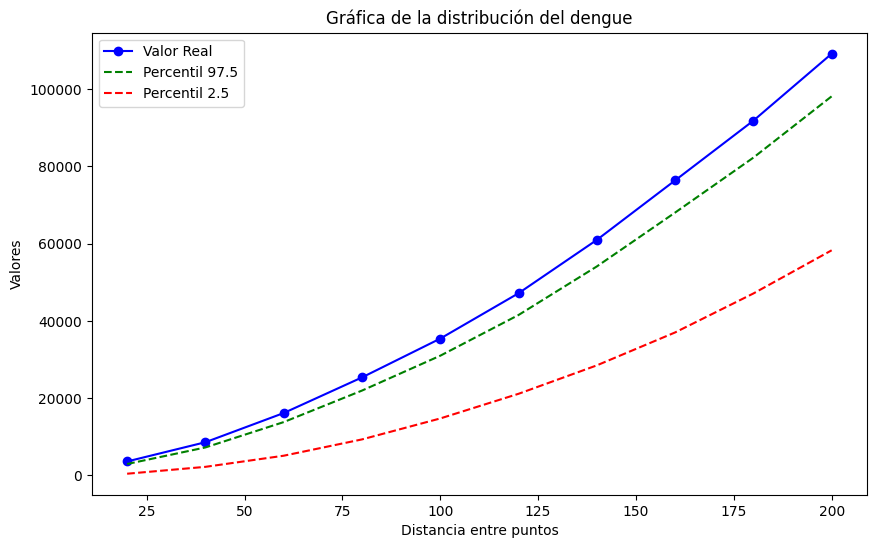

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_final['distancia'], df_final['K'], label='Valor Real', color='blue', marker='o')
plt.plot(df_final['distancia'], df_final['percentil_97.5'], label='Percentil 97.5', color='green', linestyle='--')
plt.plot(df_final['distancia'], df_final['percentil_2.5'], label='Percentil 2.5', color='red', linestyle='--')
plt.xlabel('Distancia entre puntos')
plt.ylabel('Valores')
plt.title('Gráfica de la distribución del dengue')
plt.legend()

plt.show()